In [13]:
pip install pyblp

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pyblp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pyblp.options.digits = 2 
pyblp.options.verbose = False

In [28]:
# loading data for ceraels market 
# 24 markets and 94 goods in each
product_data = pd.read_csv(pyblp.data.NEVO_PRODUCTS_LOCATION)
product_data.head()

,market_ids,city_ids,quarter,product_ids,firm_ids,brand_ids,shares,prices,sugar,mushy,...,demand_instruments10,demand_instruments11,demand_instruments12,demand_instruments13,demand_instruments14,demand_instruments15,demand_instruments16,demand_instruments17,demand_instruments18,demand_instruments19
0,C01Q1,1,1,F1B04,1,4,0.012417,0.072088,2,1,...,2.116358,-0.154708,-0.005796,0.014538,0.126244,0.067345,0.068423,0.034800,0.126346,0.035484
1,C01Q1,1,1,F1B06,1,6,0.007809,0.114178,18,1,...,-7.374091,-0.576412,0.012991,0.076143,0.029736,0.087867,0.110501,0.087784,0.049872,0.072579
2,C01Q1,1,1,F1B07,1,7,0.012995,0.132391,4,1,...,2.187872,-0.207346,0.003509,0.091781,0.163773,0.111881,0.108226,0.086439,0.122347,0.101842
3,C01Q1,1,1,F1B09,1,9,0.005770,0.130344,3,0,...,2.704576,0.040748,-0.003724,0.094732,0.135274,0.088090,0.101767,0.101777,0.110741,0.104332
4,C01Q1,1,1,F1B11,1,11,0.017934,0.154823,12,0,...,1.261242,0.034836,-0.000568,0.102451,0.130640,0.084818,0.101075,0.125169,0.133464,0.121111


In [29]:
# plain logit.formulation
# writing an equation for deltas
# delta = ...
logit_formulation = pyblp.Formulation('1 + sugar + mushy + prices')

# defining an estimation problem (combination af data and formulation)
problem = pyblp.Problem(logit_formulation, product_data)

In [30]:
problem
# 23 intsrument (20 instruments + sugar + mushy + const)

Dimensions:
 T    N     F    K1    MD 
---  ----  ---  ----  ----
94   2256   5    4     23 

Formulations:
     Column Indices:         0     1      2      3   
--------------------------  ---  -----  -----  ------
X1: Linear Characteristics   1   sugar  mushy  prices

In [31]:
logit_results = problem.solve()
logit_results

#sugar - positive coef значимый
#mushy - positive coef незначимый
#prices - negative coef значимый

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +2.0E+02      0         +3.2E+08          +1.6E+05     

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    1         sugar       mushy       prices  
----------  ----------  ----------  ----------
 -2.9E+00    +4.8E-02    +7.8E-02    -1.1E+01 
(+1.1E-01)  (+4.2E-03)  (+5.1E-02)  (+8.4E-01)

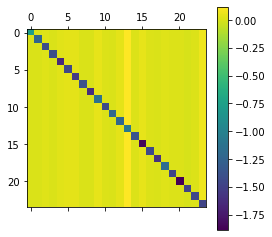

In [32]:
# computing elasticities
elasticities = logit_results.compute_elasticities()
# computing matrix od 
single_market = product_data['market_ids'] == 'C01Q1'
# elasticities[single_market]

plt.colorbar(plt.matshow(elasticities[single_market]))
# element (i,j) is the elasticity of market share of good i with respect to price j

In [33]:
# mean elasticities across products in each market
means = logit_results.extract_diagonal_means(elasticities)
means

array([[-1.4041377 ],
       [-1.372442  ],
       [-1.34378504],
       [-1.291206  ],
       [-1.27534328],
       [-1.40173829],
       [-1.331168  ],
       [-1.36595386],
       [-1.29533132],
       [-1.33106487],
       [-1.40566192],
       [-1.35028657],
       [-1.34107885],
       [-1.39483944],
       [-1.33852352],
       [-1.2969514 ],
       [-1.37765831],
       [-1.31262925],
       [-1.2959691 ],
       [-1.33952579],
       [-1.25990519],
       [-1.40978166],
       [-1.1880758 ],
       [-1.25845217],
       [-1.27709336],
       [-1.25953073],
       [-1.30833021],
       [-1.28698441],
       [-1.23870251],
       [-1.27365455],
       [-1.301604  ],
       [-1.42076271],
       [-1.39045795],
       [-1.3387063 ],
       [-1.422533  ],
       [-1.31829344],
       [-1.28113171],
       [-1.36933109],
       [-1.33189419],
       [-1.34360278],
       [-1.36760917],
       [-1.4248397 ],
       [-1.30435418],
       [-1.32909998],
       [-1.38697499],
       [-1

In [34]:
#naively trying OLS without instruments, making price its own instrument
print(product_data.columns.values)

#чтобы прогнать олс нужно взять цену в качестве инструмента
product_data_OLS = product_data.drop(product_data.columns[10:], axis=1)
print(product_data_OLS.columns.values)
product_data_OLS['demand_instruments0'] = product_data_OLS['prices']

logit_formulation_OLS = pyblp.Formulation('1 + sugar + mushy + prices')
problem_OLS = pyblp.Problem(logit_formulation_OLS, product_data_OLS)
logit_results_OLS = problem_OLS.solve()
logit_results_OLS


['market_ids' 'city_ids' 'quarter' 'product_ids' 'firm_ids' 'brand_ids'
 'shares' 'prices' 'sugar' 'mushy' 'demand_instruments0'
 'demand_instruments1' 'demand_instruments2' 'demand_instruments3'
 'demand_instruments4' 'demand_instruments5' 'demand_instruments6'
 'demand_instruments7' 'demand_instruments8' 'demand_instruments9'
 'demand_instruments10' 'demand_instruments11' 'demand_instruments12'
 'demand_instruments13' 'demand_instruments14' 'demand_instruments15'
 'demand_instruments16' 'demand_instruments17' 'demand_instruments18'
 'demand_instruments19']
['market_ids' 'city_ids' 'quarter' 'product_ids' 'firm_ids' 'brand_ids'
 'shares' 'prices' 'sugar' 'mushy']


Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +3.1E-23      0         +1.4E+05          +1.5E+05     

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    1         sugar       mushy       prices  
----------  ----------  ----------  ----------
 -3.0E+00    +4.6E-02    +5.2E-02    -1.0E+01 
(+1.0E-01)  (+4.2E-03)  (+5.3E-02)  (+8.3E-01)

In [35]:
# logit with products fixed effect

# 

logit_formulation_fe = pyblp.Formulation('0 + prices', absorb = 'C(products_ids)')
problem_fe = pyblp.Problem(logit_formulation_fe, product_data)
logit_results_fe = problem_fe.solve()
logit_results_fe

PatsyError: Failed to load data for 'products_ids' because of the above exception.
    C(products_ids)
    ^^^^^^^^^^^^^^^